# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [7]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [40]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=22)
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
xtrain = pd.DataFrame(data=scaler.transform(xtrain), columns=xtrain.columns, index=xtrain.index)
xtest = pd.DataFrame(data=scaler.transform(xtest), columns=xtest.columns, index=xtest.index)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

xtest = np.array(xtest)
ytest = np.array(ytest)

C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\ana\ananconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\ana\ananconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\ana\ananconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [41]:
output_var = 1
print(output_var, ' output variables')

dims = xtrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [42]:
xtrain.shape 

(350, 7)

In [43]:
ytrain.shape

(350,)

In [44]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [45]:
learning_rate = 0.01
training_epochs = 150
display_step = 1

In [46]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xtrain, ytrain, verbose=2,epochs=15)

Building model...
Model variables:  7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
 - 0s - loss: 1.2436
Epoch 2/15
 - 0s - loss: 0.7832
Epoch 3/15
 - 0s - loss: 0.5569
Epoch 4/15
 - 0s - loss: 0.4147
Epoch 5/15
 - 0s - loss: 0.3152
Epoch 6/15
 - 0s - loss: 0.2450
Epoch 7/15
 - 0s - loss: 0.1945
Epoch 8/15
 - 0s - loss: 0.1581
Epoch 9/15
 - 0s - loss: 0.1306
Epoch 10/15
 - 0s - loss: 0.1098
Epoch 11/15
 - 0s - loss: 0.0942
Epoch 12/15
 - 0s - loss: 0.0819
Epoch 13/15
 - 0s - loss: 0.0719
Epoch 14/15
 - 0s - loss: 0.0639
Epoch 15/15
 - 0s - loss: 0.0572


In [47]:
import keras.optimizers as opts
from livelossplot import PlotLossesKeras



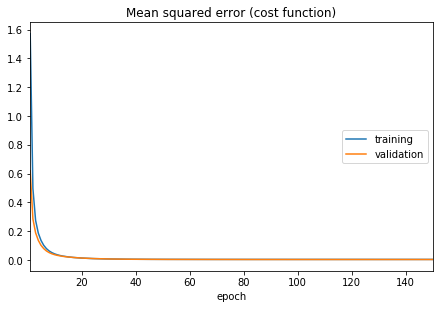

Mean squared error (cost function):
training   (min:    0.004, max:    1.571, cur:    0.004)
validation (min:    0.003, max:    0.620, cur:    0.003)


In [48]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(xtrain, ytrain,
          verbose=1, 
          epochs=150, 
          validation_data=[xtest,ytest],
          callbacks=[PlotLossesKeras()])


# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

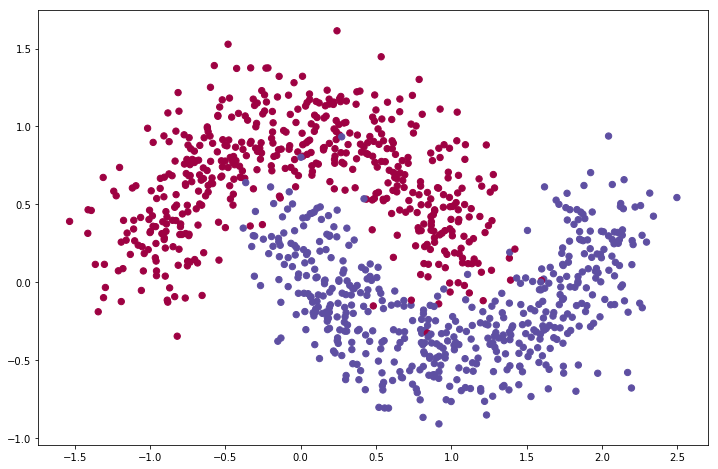

In [12]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [14]:
output_var = y_train.shape[1]
print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

1  output variables
2 input variables


In [18]:
from keras import initializers
import keras.optimizers as opts
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [25]:

K.clear_session()
print('Building Model...')

print('Model variables: ', dims)

grafico = Sequential()
grafico.add(Dense(20, input_dim=dims, activation='relu'))

grafico.add(Dense(output_var, activation='sigmoid'))

grafico.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

grafico.fit(x_train,y_train, epochs=2000)

Building Model...
Model variables:  2
Epoch 1/2000
1000/1000 [==============================] - 0s 405us/step - loss: 0.6371 - acc: 0.6500
Epoch 2/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.5744 - acc: 0.7700
Epoch 3/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.5212 - acc: 0.8120
Epoch 4/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.4763 - acc: 0.8230
Epoch 5/2000
1000/1000 [==============================] - 0s 39us/step - loss: 0.4390 - acc: 0.8260
Epoch 6/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.4093 - acc: 0.8360
Epoch 7/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.3857 - acc: 0.8380
Epoch 8/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.3672 - acc: 0.8430
Epoch 9/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.3524 - acc: 0.8490
Epoch 10/2000
1000/1000 [==============================] - 0s

1000/1000 [==============================] - 0s 58us/step - loss: 0.2332 - acc: 0.8890
Epoch 162/2000
1000/1000 [==============================] - 0s 45us/step - loss: 0.2334 - acc: 0.8910
Epoch 163/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.2334 - acc: 0.8890
Epoch 164/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.2334 - acc: 0.8880
Epoch 165/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.2333 - acc: 0.8890
Epoch 166/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.2334 - acc: 0.8910
Epoch 167/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.2335 - acc: 0.8910
Epoch 168/2000
1000/1000 [==============================] - 0s 43us/step - loss: 0.2329 - acc: 0.8910
Epoch 169/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.2331 - acc: 0.8900
Epoch 170/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.2332 - acc: 0.

1000/1000 [==============================] - 0s 46us/step - loss: 0.1755 - acc: 0.9270
Epoch 322/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.1749 - acc: 0.9250
Epoch 323/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.1740 - acc: 0.9270
Epoch 324/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.1734 - acc: 0.9260
Epoch 325/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.1731 - acc: 0.9260
Epoch 326/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.1717 - acc: 0.9280
Epoch 327/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.1711 - acc: 0.9290
Epoch 328/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.1703 - acc: 0.9300
Epoch 329/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.1695 - acc: 0.9290
Epoch 330/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.1689 - acc: 0.

1000/1000 [==============================] - 0s 37us/step - loss: 0.1005 - acc: 0.9700
Epoch 482/2000
1000/1000 [==============================] - 0s 27us/step - loss: 0.1001 - acc: 0.9700
Epoch 483/2000
1000/1000 [==============================] - 0s 40us/step - loss: 0.0997 - acc: 0.9700
Epoch 484/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0994 - acc: 0.9700
Epoch 485/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0993 - acc: 0.9700
Epoch 486/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0991 - acc: 0.9700
Epoch 487/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0988 - acc: 0.9700
Epoch 488/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0988 - acc: 0.9700
Epoch 489/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0986 - acc: 0.9700
Epoch 490/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0986 - acc: 0.

1000/1000 [==============================] - 0s 60us/step - loss: 0.0775 - acc: 0.9770
Epoch 642/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0777 - acc: 0.9750
Epoch 643/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0777 - acc: 0.9750
Epoch 644/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0778 - acc: 0.9760
Epoch 645/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0775 - acc: 0.9760
Epoch 646/2000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0775 - acc: 0.9760
Epoch 647/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0775 - acc: 0.9760
Epoch 648/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0771 - acc: 0.9760
Epoch 649/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0773 - acc: 0.9760
Epoch 650/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0774 - acc: 0.

1000/1000 [==============================] - 0s 49us/step - loss: 0.0715 - acc: 0.9780
Epoch 802/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0717 - acc: 0.9780
Epoch 803/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0720 - acc: 0.9780
Epoch 804/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0718 - acc: 0.9770
Epoch 805/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0716 - acc: 0.9780
Epoch 806/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0714 - acc: 0.9780
Epoch 807/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0716 - acc: 0.9780
Epoch 808/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0715 - acc: 0.9770
Epoch 809/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0714 - acc: 0.9770
Epoch 810/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0716 - acc: 0.

1000/1000 [==============================] - 0s 53us/step - loss: 0.0687 - acc: 0.9760
Epoch 962/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0688 - acc: 0.9770
Epoch 963/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0689 - acc: 0.9760
Epoch 964/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0689 - acc: 0.9770
Epoch 965/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0693 - acc: 0.9750
Epoch 966/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0691 - acc: 0.9770
Epoch 967/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0686 - acc: 0.9750
Epoch 968/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0688 - acc: 0.9770
Epoch 969/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0687 - acc: 0.9780
Epoch 970/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0687 - acc: 0.

1000/1000 [==============================] - 0s 57us/step - loss: 0.0683 - acc: 0.9760
Epoch 1042/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0682 - acc: 0.9760
Epoch 1043/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0681 - acc: 0.9770
Epoch 1044/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0680 - acc: 0.9780
Epoch 1045/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0681 - acc: 0.9770
Epoch 1046/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0682 - acc: 0.9770
Epoch 1047/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0682 - acc: 0.9770
Epoch 1048/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0680 - acc: 0.9760
Epoch 1049/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0680 - acc: 0.9780
Epoch 1050/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0680 

1000/1000 [==============================] - 0s 55us/step - loss: 0.0673 - acc: 0.9770
Epoch 1200/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0672 - acc: 0.9780
Epoch 1201/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0675 - acc: 0.9760
Epoch 1202/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0673 - acc: 0.9780
Epoch 1203/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0674 - acc: 0.9760
Epoch 1204/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0673 - acc: 0.9770
Epoch 1205/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0674 - acc: 0.9760
Epoch 1206/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0674 - acc: 0.9780
Epoch 1207/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0672 - acc: 0.9770
Epoch 1208/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0671 

1000/1000 [==============================] - 0s 56us/step - loss: 0.0668 - acc: 0.9760
Epoch 1358/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0674 - acc: 0.9790
Epoch 1359/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0667 - acc: 0.9790
Epoch 1360/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0668 - acc: 0.9770
Epoch 1361/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0666 - acc: 0.9790
Epoch 1362/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0666 - acc: 0.9770
Epoch 1363/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0668 - acc: 0.9790
Epoch 1364/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0668 - acc: 0.9790
Epoch 1365/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0669 - acc: 0.9790
Epoch 1366/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0669 

1000/1000 [==============================] - 0s 60us/step - loss: 0.0663 - acc: 0.9790
Epoch 1516/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0662 - acc: 0.9790
Epoch 1517/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0664 - acc: 0.9790
Epoch 1518/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0663 - acc: 0.9790
Epoch 1519/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0662 - acc: 0.9780
Epoch 1520/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0665 - acc: 0.9770
Epoch 1521/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0663 - acc: 0.9780
Epoch 1522/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0664 - acc: 0.9790
Epoch 1523/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0663 - acc: 0.9780
Epoch 1524/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0662 

1000/1000 [==============================] - 0s 36us/step - loss: 0.0660 - acc: 0.9790
Epoch 1674/2000
1000/1000 [==============================] - 0s 46us/step - loss: 0.0663 - acc: 0.9780
Epoch 1675/2000
1000/1000 [==============================] - 0s 42us/step - loss: 0.0660 - acc: 0.9790
Epoch 1676/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0662 - acc: 0.9800
Epoch 1677/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0660 - acc: 0.9790
Epoch 1678/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0662 - acc: 0.9790
Epoch 1679/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0658 - acc: 0.9790
Epoch 1680/2000
1000/1000 [==============================] - 0s 27us/step - loss: 0.0661 - acc: 0.9790
Epoch 1681/2000
1000/1000 [==============================] - 0s 26us/step - loss: 0.0663 - acc: 0.9800
Epoch 1682/2000
1000/1000 [==============================] - 0s 26us/step - loss: 0.0661 

1000/1000 [==============================] - 0s 53us/step - loss: 0.0655 - acc: 0.9810
Epoch 1832/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0657 - acc: 0.9800
Epoch 1833/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0655 - acc: 0.9800
Epoch 1834/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0657 - acc: 0.9780
Epoch 1835/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0656 - acc: 0.9780
Epoch 1836/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0655 - acc: 0.9780
Epoch 1837/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0659 - acc: 0.9770
Epoch 1838/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0660 - acc: 0.9800
Epoch 1839/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0658 - acc: 0.9800
Epoch 1840/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0655 

1000/1000 [==============================] - 0s 58us/step - loss: 0.0652 - acc: 0.9780
Epoch 1990/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0656 - acc: 0.9800
Epoch 1991/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0653 - acc: 0.9780
Epoch 1992/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0655 - acc: 0.9780
Epoch 1993/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0653 - acc: 0.9790
Epoch 1994/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0653 - acc: 0.9780
Epoch 1995/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0658 - acc: 0.9780
Epoch 1996/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0657 - acc: 0.9780
Epoch 1997/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0656 - acc: 0.9770
Epoch 1998/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0652 

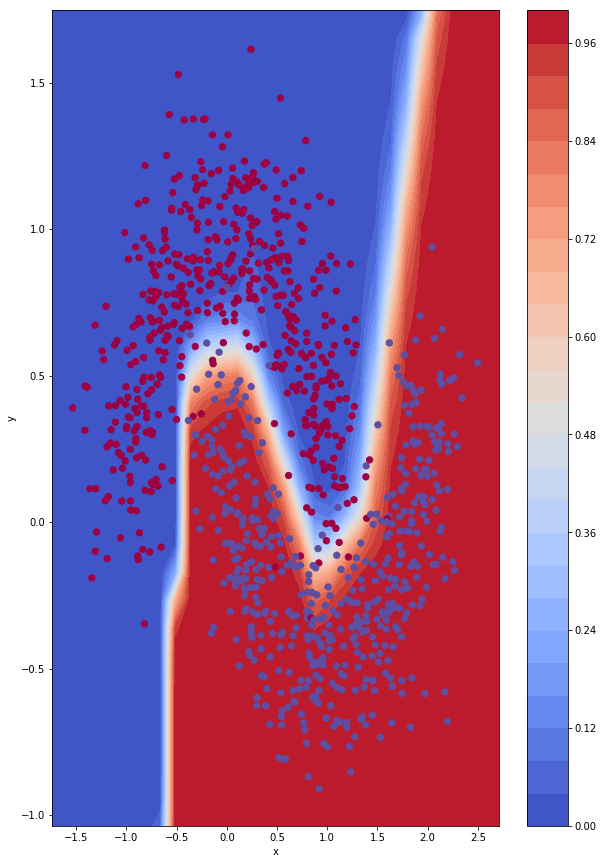

In [26]:
from keras.models import load_model
import matplotlib.pyplot as plt
model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (10,15))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(grafico, x_train, pred_fun)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()